<a href="https://colab.research.google.com/github/NayeGarciaP/Mi-primer-repositorio-/blob/main/Redes_de_multicapa/ACTIVIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`XOR`**

Datos

In [1]:
# Los datos los traduccimos a lenguaje computacional de la siguiente manera
import numpy as np

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


Red neuronal multicapa
Definir el modelo de red neuronal

In [2]:
# Se utiliza Sequential para definir el modelo de red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2), #primera capa oculta, tiene 4 neuronas
    Dense(1, activation='sigmoid') #Tiene una neurona
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


COMPILAMOS EL MODELO
Crear un optimizador Adam con una tasa de aprendizaje del 0.01

In [3]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01 #Este valor controla que tan rapido aprende el modelo
adam_optimizer = Adam(learning_rate=learning_rate)


In [4]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Se compila el modelo utilizando el optimizador Adam y la funcion de perdida


Entrenar el modelo

In [5]:
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=1,
)

#Se entrena el modelo en los datos de entrenamiento utilizando fit
# Se especifica el numero de epocas que va a realizar el entrenamiento

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7170
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.5000 - loss: 0.7150
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5000 - loss: 0.7132
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.2500 - loss: 0.7115
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.2500 - loss: 0.7099
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.2500 - loss: 0.7084
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.2500 - loss: 0.7070
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.2500 - loss: 0.7056
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.2500 - loss: 0.7043
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2500 - loss: 0.7030
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2500 - loss: 0.7017
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2500 - loss:

Gráficando la funcion de pérdida

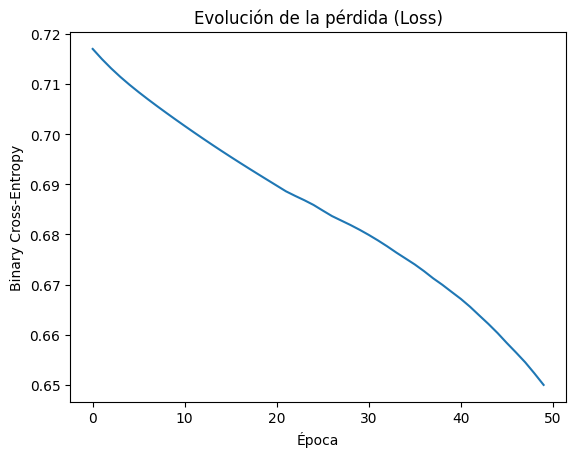

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

Evaluación

Evaluar el modelo en el conjunto de prueba

In [7]:
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')
# Se evalua el rendimiento del modelo utilizando evaluate
# Se obtiene la perdida y la precision del modelo en los datos de prueba


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.7500 - loss: 0.6477
Loss: 0.6476932168006897, Accuracy: 0.75


Predicción

In [8]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[0 0] -> 1
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


Usamos la lobreria numpy para manejar los numeros.
(TensorFlow) permite construir redes neuronales.

Sequential es el modelo donde las capas se añaden una tras otra.

Dense es la capa conectada (cada neurona conecta con todas las de la capa anterior).
El 0.01 es el valor que controla que tan rapido aprende el modelo
optimizer=adam_optimizer indica qué algoritmo ajustará los pesos.
loss='binary_crossentropy' es la función de pérdida usada en problemas binarios (mide qué tan lejos están las predicciones de los valores reales).

metrics=['accuracy'] mostrará la precisión durante el entrenamiento.
La red entrena durante 50 epocas, la "x" son las entradas y las "y" son las salidas
